# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果  

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [16]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [17]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

S-curve, perplexity=4 in 0.84 sec
S-curve, perplexity=6 in 0.86 sec
S-curve, perplexity=9 in 0.93 sec
S-curve, perplexity=14 in 0.94 sec
S-curve, perplexity=21 in 1.1 sec
S-curve, perplexity=30 in 1.1 sec
S-curve, perplexity=45 in 1.2 sec
S-curve, perplexity=66 in 1.1 sec
S-curve, perplexity=100 in 1.7 sec


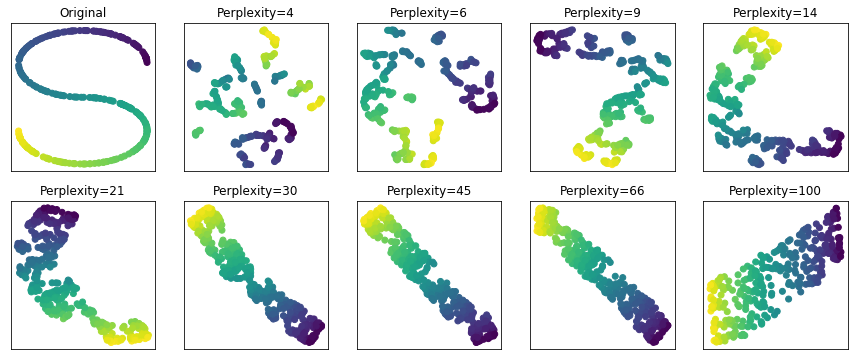

In [18]:
# 繪製資料原圖
#(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))

plt.figure(figsize=(15,6))
plt.subplot(2,5,1)  # 第一處
plt.title("Original")
plt.scatter(X[:, 0], X[:, 2], c=color)
plt.xticks(())
plt.yticks(())

# 繪製不同 perplexity 下的 t-SNE 分群圖
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4] # 第二處

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',  #t-SNE 演算法具有隨機性，多次實驗可以產生不同的結果
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    
    plt.subplot(2,5,i+2)  # 第三處
    plt.title("Perplexity=%d" % perplexity)
    plt.scatter(Y[:, 0], Y[:, 1], c=color)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
plt.show()

S-curve, perplexity=6 in 0.87 sec
S-curve, perplexity=9 in 0.96 sec
S-curve, perplexity=14 in 1.1 sec
S-curve, perplexity=21 in 1.1 sec
S-curve, perplexity=30 in 1.1 sec
S-curve, perplexity=45 in 0.93 sec
S-curve, perplexity=66 in 1.1 sec
S-curve, perplexity=100 in 1.8 sec
S-curve, perplexity=200 in 1.7 sec
S-curve, perplexity=250 in 1.2 sec
S-curve, perplexity=300 in 0.82 sec


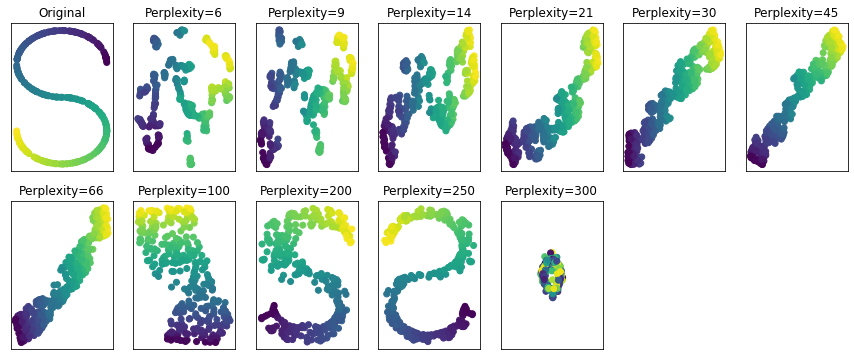

In [19]:
# 繪製資料原圖
plt.figure(figsize=(15,6))

#ax = subplots[0][0]
plt.subplot(2,7,1)  # 第一處
plt.title("Original")
plt.scatter(X[:, 0], X[:, 2], c=color)
plt.xticks(())
plt.yticks(())

# 繪製不同 perplexity 下的 t-SNE 分群圖
perplexities = [6, 9, 14, 21, 30, 45, 66, 100, 200, 250, 300]  # 多一些perplexity觀察

for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-6] # +4 更動時要留意. 第二處

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',  # PCA 是確定性的（deterministic），每次計算後的結果相同
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    
    plt.subplot(2,7,i+2)  # 第三處
    plt.title("Perplexity=%d" % perplexity)
    plt.scatter(Y[:, 0], Y[:, 1], c=color)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
plt.show()

# 結論

> 由結果可以發現, 在S型的資料時, 雖然 perplexity 越高流形效果越好, 但是並不會接近原圖, 主要是因為資料不像同心圓需要首尾相接, 因此在還原流型時會變成一直線, 在一定範圍內的perplexity時間越長, 效果越好.  
> 另外, Initialization of embedding用random或pca來看, pca的manifold learning效果較佳 

註:
大的資料集需要更大的perplexity。perplexity可以解釋成有效鄰近樣本點數量，perplexity越大，近鄰越多，對小區域的敏感度就越小，
因此可以有以下結論：
(1)perplexity低：只有少數鄰居有影響力，可能把同分群拆成多群。
(2)perplexity高：全局結構較明顯，但可能群與群之間會無法區分。
不同的perplexity對產生的結果影響很大，因此判讀時可以考慮畫出多個圖比較。